# Logistic Regression:



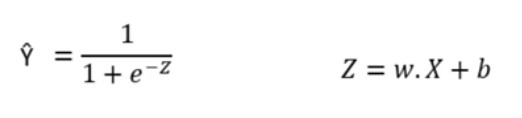

Y_hat => predicted value

X     => input variable

w     => weight

b     => bias

### Grabient Descent :- 
    is an optimization algorism used for minimizing the
    loss function in various machine learning algorisms.
    it's used for updating the parameters of learning
    model. 

w = w - a * dw

b = b - a * db

### Learning rate :-
    is tuning parameter in an optimization algorism that
    determines the step size at each iteration while
    moving toward a minimum of a loss function. 

## Derivatives :-

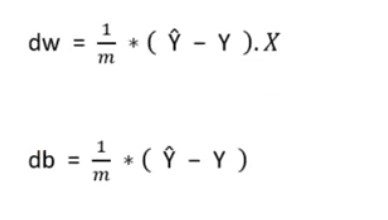

## Logistic Regresiion Implimentation

In [34]:
import numpy as np

class Logistic_Regression():

    # declare larning rate and number of iterations (Hyperparameters)
    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    # fit function to train model with data set
    def fit(self,X,Y):

        self.m, self.n = X.shape
        # number of rows ==> m
        #number of column => n

        # initiation wight & bias value
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

    #impliminting gradient descent 
        for i in range(self.no_of_iterations):
            self.update_wights()

    def update_wights(self):
        # Y_hat formula (sigmoid function)
        Z = self.X.dot(self.w)+self.b
        Y_hat = 1/(1+np.exp(-(Z))) 

        #derivative
        dw = (1/self.m)*np.dot(self.X.T,(Y_hat - self.Y))
        db = (1/self.m)*np.sum(Y_hat - self.Y)

        #updating the weights and bias using gradient descent 
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self,X):
        Y_pred = 1/(1+np.exp(- (X.dot(self.w) + self.b)))
        Y_pred = np.where(Y_pred > 0.5,1,0)
        return Y_pred

# Using logistic regrssion 

## Importing The Dependencies

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")


## Read the data

In [36]:
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

## Display first 5 rows

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Display last 5 rows

In [38]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Display random 5 rows

In [39]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
753,0,181,88,44,510,43.3,0.222,26,1
39,4,111,72,47,207,37.1,1.390,56,1
211,0,147,85,54,0,42.8,0.375,24,0
199,4,148,60,27,318,30.9,0.150,29,1
235,4,171,72,0,0,43.6,0.479,26,1


## Display number of columns and rows



In [40]:
print("The Shape of DataFrame is: ",df.shape)

The Shape of DataFrame is:  (768, 9)


## some statistical measures

In [41]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [43]:
df.groupby("Outcome").std()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.017185,26.141200,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
1,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254


In [44]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

1 => Diabetes

0 => Non-Diabetes

<Axes: xlabel='Outcome', ylabel='count'>

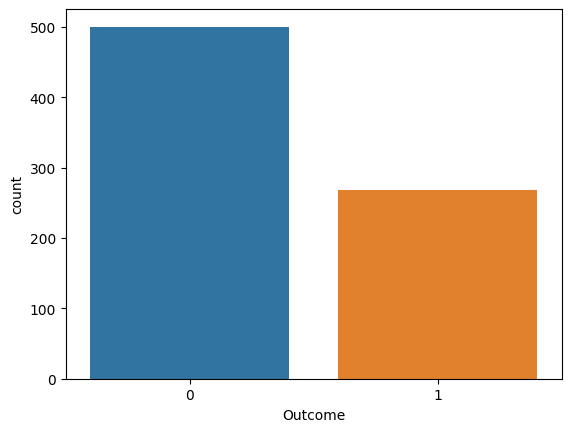

In [45]:
sns.countplot(x='Outcome',data=df)

In [46]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [47]:
df.kurt()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

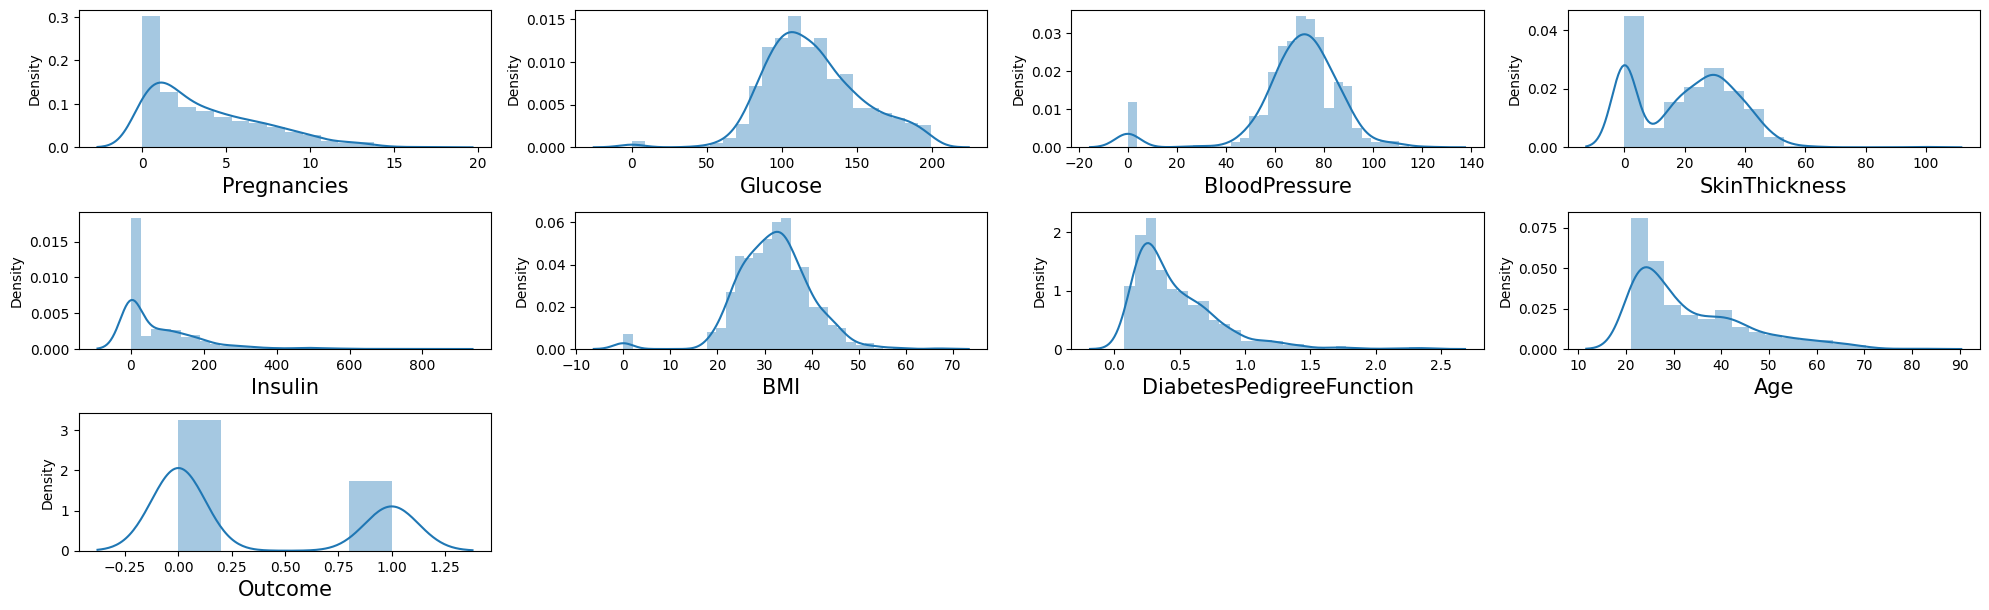

In [48]:
plt.figure(figsize=(20,40))
plotnum = 1
for columns in df:
    if plotnum <= len(df.columns) :
        ax=plt.subplot(20,4,plotnum)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=15)
    plotnum += 1
plt.tight_layout() 
plt.show()

<Axes: >

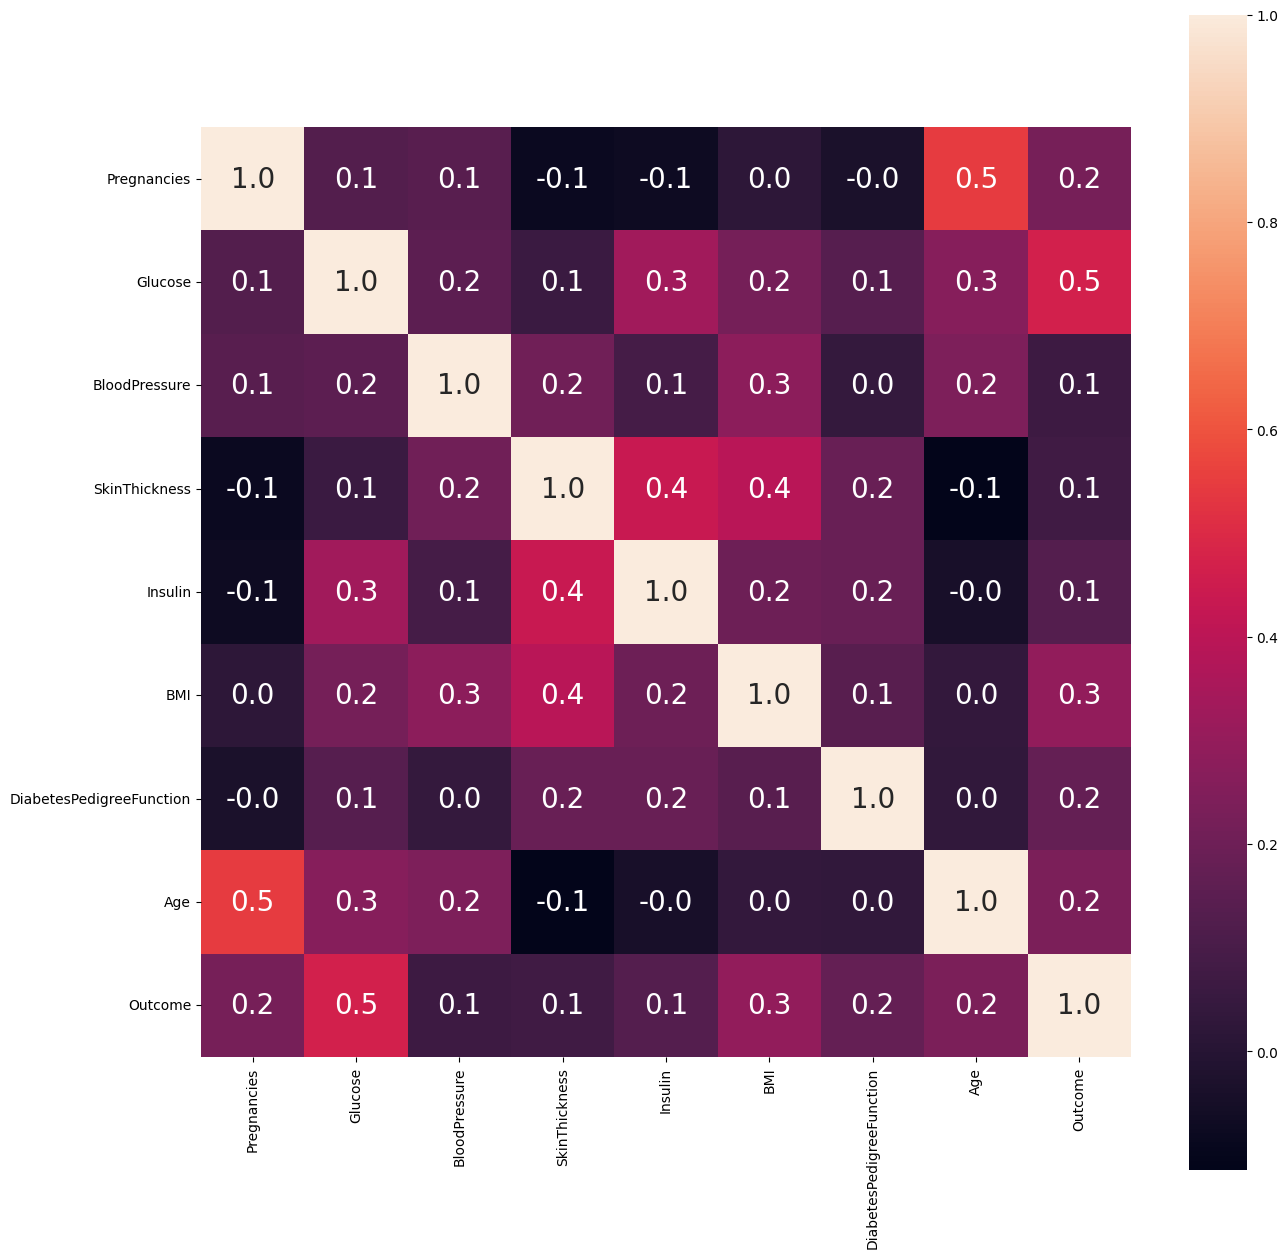

In [49]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,fmt='.1f',cbar=True,square=True,annot=True,annot_kws={'size':20})

## show some informations about dataframe


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
print("The Number of Null in DataFrame is: ",df.isnull().sum().sum())

The Number of Null in DataFrame is:  0


In [52]:
print("The Number of NAN in DataFrame is: ",df.isna().sum().sum())

The Number of NAN in DataFrame is:  0


In [53]:
print("The Number of duplicated in DataFrame is: ",df.duplicated().sum().sum())

The Number of duplicated in DataFrame is:  0


## Separating the data

In [54]:
features = df.iloc[:,:-1].values
target = df.iloc[:,-1].values

In [55]:
features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [56]:
target

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

## Standerized the Data

In [57]:
scaler = StandardScaler()

In [58]:
standerized_features = scaler.fit_transform(features)

In [59]:
standerized_features.std()

1.0

## Train Test split

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(standerized_features,target,test_size=0.2,random_state=11,stratify=target)

## Train the Model

In [61]:
classifier = Logistic_Regression(learning_rate=0.01,no_of_iterations=1000)


In [62]:
classifier.fit(X_train,Y_train)

 ## Model evaluation

In [63]:
Y_train_pred = classifier.predict(X_train)
score1=accuracy_score(Y_train,Y_train_pred)

print("The Accurcy Score of Trainning Data is :  ", score1)

The Accurcy Score of Trainning Data is :   0.7703583061889251


In [64]:
Y_test_pred = classifier.predict(X_test)
score2=accuracy_score(Y_test,Y_test_pred)

print("The Accurcy Score of testning Data is :  ", score2)

The Accurcy Score of testning Data is :   0.7662337662337663


## Make Prediction System

In [65]:
input_data=(6,148,72,35,0,33.6,0.627,50)
input_as_array=np.asarray(input_data)
input_reshaped=input_as_array.reshape(1,-1)

prediction =classifier.predict(input_reshaped)
if prediction == 0:
    prediction = "Non-Diabetes"
else :
    prediction = "Diabetes"

print(f"the Final Prediction Is  : {prediction}")

the Final Prediction Is  : Diabetes


# Logistic Regression By clude Ai

Converged at iteration 336
Model Metrics:
accuracy: 0.7721
precision: 0.7291
recall: 0.5522
f1: 0.6285
auc: 0.8376


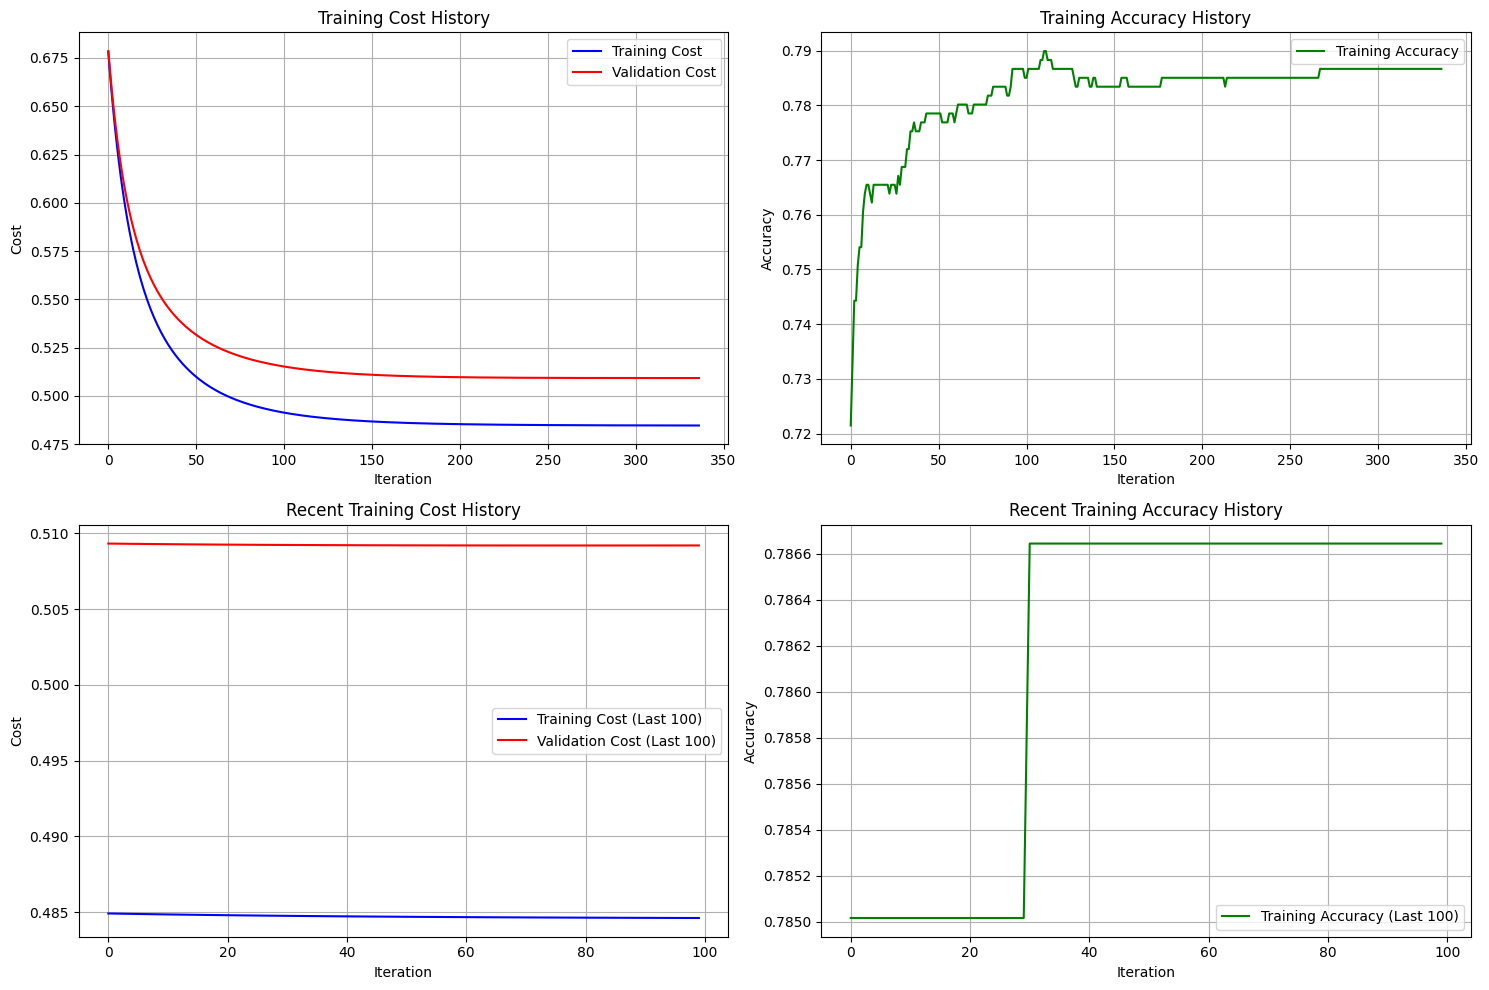

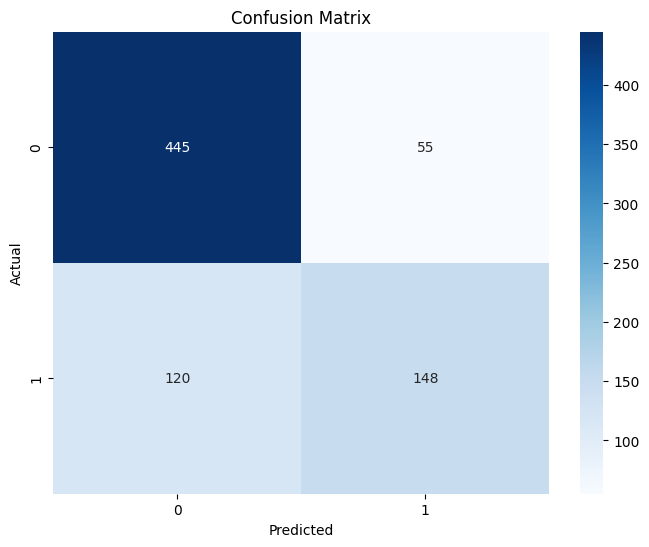

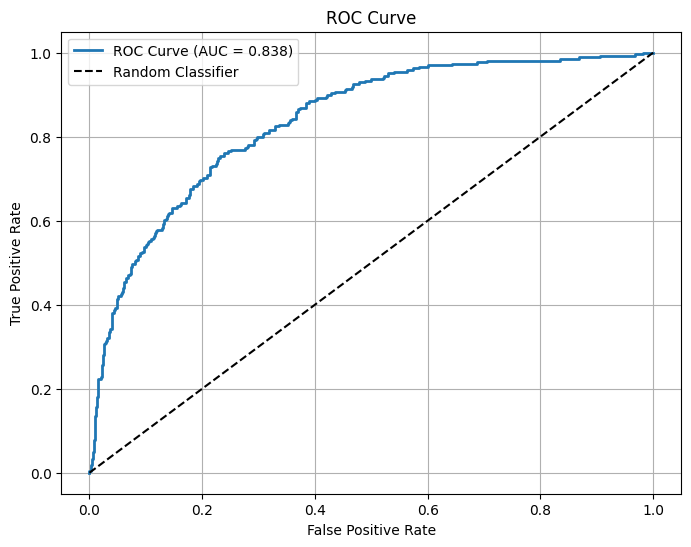


Classification Report:
              precision    recall  f1-score   support

     Class_0       0.79      0.89      0.84       500
     Class_1       0.73      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.76       768


Model Summary:
LogisticRegression(
    learning_rate=0.1,
    max_iterations=1000,
    regularization=ridge,
    alpha=0.01,
    n_iterations_=337,
    n_classes_=2,
    n_features=8,
    final_cost=0.484606,
    final_accuracy=0.7866
)


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from typing import Optional, Tuple, Dict, List
import warnings
import seaborn as sns

class LogisticRegression:
    """
    Enhanced Logistic Regression with advanced features and optimizations.
    
    Features:
    - Regularization (Ridge, Lasso, Elastic Net)
    - Feature scaling
    - Early stopping
    - Cost history tracking
    - Multi-class classification support
    - Advanced metrics and visualization
    - Cross-validation ready
    - Probability calibration
    """
    
    def __init__(self, 
                 learning_rate: float = 0.01,
                 max_iterations: int = 1000,
                 regularization: Optional[str] = None,
                 alpha: float = 0.01,
                 l1_ratio: float = 0.5,
                 tolerance: float = 1e-6,
                 early_stopping: bool = True,
                 validation_split: float = 0.2,
                 random_state: int = 42,
                 normalize: bool = True,
                 threshold: float = 0.5,
                 solver: str = 'gradient_descent',
                 multi_class: str = 'ovr'):
        """
        Initialize Logistic Regression model.
        
        Parameters:
        -----------
        learning_rate : float, default=0.01
            Learning rate for gradient descent
        max_iterations : int, default=1000
            Maximum number of iterations
        regularization : str, optional
            Type of regularization ('ridge', 'lasso', 'elastic_net')
        alpha : float, default=0.01
            Regularization strength
        l1_ratio : float, default=0.5
            L1 ratio for elastic net (0=Ridge, 1=Lasso)
        tolerance : float, default=1e-6
            Tolerance for early stopping
        early_stopping : bool, default=True
            Whether to use early stopping
        validation_split : float, default=0.2
            Fraction of data to use for validation
        random_state : int, default=42
            Random seed for reproducibility
        normalize : bool, default=True
            Whether to normalize features
        threshold : float, default=0.5
            Decision threshold for binary classification
        solver : str, default='gradient_descent'
            Optimization algorithm ('gradient_descent', 'newton_raphson')
        multi_class : str, default='ovr'
            Multi-class strategy ('ovr', 'multinomial')
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.regularization = regularization
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.tolerance = tolerance
        self.early_stopping = early_stopping
        self.validation_split = validation_split
        self.random_state = random_state
        self.normalize = normalize
        self.threshold = threshold
        self.solver = solver
        self.multi_class = multi_class
        
        # Initialize attributes
        self.weights_ = None
        self.bias_ = None
        self.cost_history_ = []
        self.val_cost_history_ = []
        self.accuracy_history_ = []
        self.n_iterations_ = 0
        self.scaler_ = None
        self.classes_ = None
        self.n_classes_ = None
        
        # Set random seed
        np.random.seed(self.random_state)
    
    def _sigmoid(self, z: np.ndarray) -> np.ndarray:
        """
        Compute sigmoid function with numerical stability.
        
        Parameters:
        -----------
        z : np.ndarray
            Input values
            
        Returns:
        --------
        sigmoid : np.ndarray
            Sigmoid of input values
        """
        # Clip z to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _softmax(self, z: np.ndarray) -> np.ndarray:
        """
        Compute softmax function with numerical stability.
        
        Parameters:
        -----------
        z : np.ndarray
            Input values
            
        Returns:
        --------
        softmax : np.ndarray
            Softmax of input values
        """
        # Subtract max for numerical stability
        z_stable = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def _one_hot_encode(self, y: np.ndarray) -> np.ndarray:
        """Convert labels to one-hot encoding."""
        n_samples = len(y)
        one_hot = np.zeros((n_samples, self.n_classes_))
        one_hot[np.arange(n_samples), y] = 1
        return one_hot
    
    def _train_val_split(self, X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """Split data into training and validation sets."""
        return train_test_split(X, y, test_size=self.validation_split, 
                               random_state=self.random_state, stratify=y)
    
    def _compute_cost(self, X: np.ndarray, y: np.ndarray, weights: np.ndarray, bias: float) -> float:
        """
        Compute logistic regression cost function with regularization.
        
        Parameters:
        -----------
        X : np.ndarray
            Feature matrix
        y : np.ndarray
            Target values
        weights : np.ndarray
            Model weights
        bias : float
            Model bias
            
        Returns:
        --------
        cost : float
            Cost value
        """
        m = X.shape[0]
        
        if self.n_classes_ == 2:
            # Binary classification
            z = X.dot(weights) + bias
            y_pred = self._sigmoid(z)
            
            # Prevent log(0) by adding small epsilon
            epsilon = 1e-15
            y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
            
            cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        else:
            # Multi-class classification
            z = X.dot(weights) + bias
            y_pred = self._softmax(z)
            
            # Convert y to one-hot if needed
            if len(y.shape) == 1:
                y_one_hot = self._one_hot_encode(y)
            else:
                y_one_hot = y
            
            # Cross-entropy loss
            epsilon = 1e-15
            y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
            cost = -np.mean(np.sum(y_one_hot * np.log(y_pred), axis=1))
        
        # Add regularization term
        reg_term = 0
        if self.regularization == 'ridge':
            reg_term = self.alpha * np.sum(weights ** 2)
        elif self.regularization == 'lasso':
            reg_term = self.alpha * np.sum(np.abs(weights))
        elif self.regularization == 'elastic_net':
            l1_term = self.l1_ratio * np.sum(np.abs(weights))
            l2_term = (1 - self.l1_ratio) * np.sum(weights ** 2)
            reg_term = self.alpha * (l1_term + l2_term)
        
        return cost + reg_term
    
    def _update_weights_binary(self, X: np.ndarray, y: np.ndarray) -> None:
        """Update weights for binary classification."""
        m = X.shape[0]
        
        # Forward pass
        z = X.dot(self.weights_) + self.bias_
        y_pred = self._sigmoid(z)
        
        # Compute gradients
        dw = (1/m) * X.T.dot(y_pred - y)
        db = (1/m) * np.sum(y_pred - y)
        
        # Add regularization gradients
        if self.regularization == 'ridge':
            dw += 2 * self.alpha * self.weights_
        elif self.regularization == 'lasso':
            dw += self.alpha * np.sign(self.weights_)
        elif self.regularization == 'elastic_net':
            l1_grad = self.alpha * self.l1_ratio * np.sign(self.weights_)
            l2_grad = 2 * self.alpha * (1 - self.l1_ratio) * self.weights_
            dw += l1_grad + l2_grad
        
        # Update parameters
        if self.solver == 'gradient_descent':
            self.weights_ -= self.learning_rate * dw
            self.bias_ -= self.learning_rate * db
        elif self.solver == 'newton_raphson':
            # Simplified Newton-Raphson update
            hessian_diag = np.mean(y_pred * (1 - y_pred)) + 1e-8
            self.weights_ -= (self.learning_rate / hessian_diag) * dw
            self.bias_ -= (self.learning_rate / hessian_diag) * db
    
    def _update_weights_multiclass(self, X: np.ndarray, y: np.ndarray) -> None:
        """Update weights for multi-class classification."""
        m = X.shape[0]
        
        # Forward pass
        z = X.dot(self.weights_) + self.bias_
        y_pred = self._softmax(z)
        
        # Convert y to one-hot if needed
        if len(y.shape) == 1:
            y_one_hot = self._one_hot_encode(y)
        else:
            y_one_hot = y
        
        # Compute gradients
        dw = (1/m) * X.T.dot(y_pred - y_one_hot)
        db = (1/m) * np.sum(y_pred - y_one_hot, axis=0)
        
        # Add regularization gradients
        if self.regularization == 'ridge':
            dw += 2 * self.alpha * self.weights_
        elif self.regularization == 'lasso':
            dw += self.alpha * np.sign(self.weights_)
        elif self.regularization == 'elastic_net':
            l1_grad = self.alpha * self.l1_ratio * np.sign(self.weights_)
            l2_grad = 2 * self.alpha * (1 - self.l1_ratio) * self.weights_
            dw += l1_grad + l2_grad
        
        # Update parameters
        self.weights_ -= self.learning_rate * dw
        self.bias_ -= self.learning_rate * db
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LogisticRegression':
        """
        Fit the logistic regression model.
        
        Parameters:
        -----------
        X : np.ndarray
            Training features
        y : np.ndarray
            Training targets
        
        Returns:
        --------
        self : LogisticRegression
            Fitted model
        """
        # Determine number of classes
        self.classes_ = np.unique(y)
        self.n_classes_ = len(self.classes_)
        
        # Normalize features if requested
        if self.normalize:
            self.scaler_ = StandardScaler()
            X = self.scaler_.fit_transform(X)
        
        # Split data for early stopping
        if self.early_stopping and self.validation_split > 0:
            X_train, X_val, y_train, y_val = self._train_val_split(X, y)
        else:
            X_train, y_train = X, y
            X_val, y_val = None, None
        
        # Initialize parameters
        if self.n_classes_ == 2:
            self.weights_ = np.random.normal(0, 0.01, X_train.shape[1])
            self.bias_ = 0
        else:
            self.weights_ = np.random.normal(0, 0.01, (X_train.shape[1], self.n_classes_))
            self.bias_ = np.zeros(self.n_classes_)
        
        # Training loop
        best_val_cost = float('inf')
        patience_counter = 0
        patience = 50
        
        for i in range(self.max_iterations):
            # Update weights
            if self.n_classes_ == 2:
                self._update_weights_binary(X_train, y_train)
            else:
                self._update_weights_multiclass(X_train, y_train)
            
            # Compute costs
            train_cost = self._compute_cost(X_train, y_train, self.weights_, self.bias_)
            self.cost_history_.append(train_cost)
            
            # Compute accuracy
            train_pred = self.predict(X_train)
            train_accuracy = accuracy_score(y_train, train_pred)
            self.accuracy_history_.append(train_accuracy)
            
            if X_val is not None:
                val_cost = self._compute_cost(X_val, y_val, self.weights_, self.bias_)
                self.val_cost_history_.append(val_cost)
                
                # Early stopping
                if val_cost < best_val_cost - self.tolerance:
                    best_val_cost = val_cost
                    patience_counter = 0
                else:
                    patience_counter += 1
                
                if patience_counter >= patience:
                    print(f"Early stopping at iteration {i}")
                    break
            
            # Check convergence
            if i > 0 and abs(self.cost_history_[-1] - self.cost_history_[-2]) < self.tolerance:
                print(f"Converged at iteration {i}")
                break
        
        self.n_iterations_ = i + 1
        return self
    
    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """
        Predict class probabilities.
        
        Parameters:
        -----------
        X : np.ndarray
            Input features
        
        Returns:
        --------
        probabilities : np.ndarray
            Predicted probabilities
        """
        if self.weights_ is None:
            raise ValueError("Model must be fitted before making predictions")
        
        # Normalize features if scaler was used
        if self.scaler_ is not None:
            X = self.scaler_.transform(X)
        
        if self.n_classes_ == 2:
            z = X.dot(self.weights_) + self.bias_
            prob_pos = self._sigmoid(z)
            return np.column_stack([1 - prob_pos, prob_pos])
        else:
            z = X.dot(self.weights_) + self.bias_
            return self._softmax(z)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Make predictions on new data.
        
        Parameters:
        -----------
        X : np.ndarray
            Input features
        
        Returns:
        --------
        predictions : np.ndarray
            Predicted class labels
        """
        if self.n_classes_ == 2:
            probabilities = self.predict_proba(X)[:, 1]
            return (probabilities >= self.threshold).astype(int)
        else:
            probabilities = self.predict_proba(X)
            return np.argmax(probabilities, axis=1)
    
    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate accuracy score."""
        predictions = self.predict(X)
        return accuracy_score(y, predictions)
    
    def get_metrics(self, X: np.ndarray, y: np.ndarray) -> Dict[str, float]:
        """
        Get comprehensive evaluation metrics.
        
        Parameters:
        -----------
        X : np.ndarray
            Input features
        y : np.ndarray
            True labels
        
        Returns:
        --------
        metrics : dict
            Dictionary of evaluation metrics
        """
        predictions = self.predict(X)
        probabilities = self.predict_proba(X)
        
        metrics = {
            'accuracy': accuracy_score(y, predictions),
            'precision': precision_score(y, predictions, average='weighted' if self.n_classes_ > 2 else 'binary'),
            'recall': recall_score(y, predictions, average='weighted' if self.n_classes_ > 2 else 'binary'),
            'f1': f1_score(y, predictions, average='weighted' if self.n_classes_ > 2 else 'binary')
        }
        
        # Add AUC for binary classification
        if self.n_classes_ == 2:
            metrics['auc'] = roc_auc_score(y, probabilities[:, 1])
        
        return metrics
    
    def plot_training_history(self) -> None:
        """Plot training history."""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Cost history
        axes[0, 0].plot(self.cost_history_, label='Training Cost', color='blue')
        if self.val_cost_history_:
            axes[0, 0].plot(self.val_cost_history_, label='Validation Cost', color='red')
        axes[0, 0].set_title('Training Cost History')
        axes[0, 0].set_xlabel('Iteration')
        axes[0, 0].set_ylabel('Cost')
        axes[0, 0].legend()
        axes[0, 0].grid(True)
        
        # Accuracy history
        axes[0, 1].plot(self.accuracy_history_, label='Training Accuracy', color='green')
        axes[0, 1].set_title('Training Accuracy History')
        axes[0, 1].set_xlabel('Iteration')
        axes[0, 1].set_ylabel('Accuracy')
        axes[0, 1].legend()
        axes[0, 1].grid(True)
        
        # Recent cost history
        axes[1, 0].plot(self.cost_history_[-100:], label='Training Cost (Last 100)', color='blue')
        if self.val_cost_history_:
            axes[1, 0].plot(self.val_cost_history_[-100:], label='Validation Cost (Last 100)', color='red')
        axes[1, 0].set_title('Recent Training Cost History')
        axes[1, 0].set_xlabel('Iteration')
        axes[1, 0].set_ylabel('Cost')
        axes[1, 0].legend()
        axes[1, 0].grid(True)
        
        # Recent accuracy history
        axes[1, 1].plot(self.accuracy_history_[-100:], label='Training Accuracy (Last 100)', color='green')
        axes[1, 1].set_title('Recent Training Accuracy History')
        axes[1, 1].set_xlabel('Iteration')
        axes[1, 1].set_ylabel('Accuracy')
        axes[1, 1].legend()
        axes[1, 1].grid(True)
        
        plt.tight_layout()
        plt.show()
    
    def plot_confusion_matrix(self, X: np.ndarray, y: np.ndarray) -> None:
        """Plot confusion matrix."""
        predictions = self.predict(X)
        cm = confusion_matrix(y, predictions)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.classes_, yticklabels=self.classes_)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    
    def plot_roc_curve(self, X: np.ndarray, y: np.ndarray) -> None:
        """Plot ROC curve for binary classification."""
        if self.n_classes_ != 2:
            print("ROC curve is only available for binary classification")
            return
        
        from sklearn.metrics import roc_curve
        
        probabilities = self.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, probabilities)
        auc = roc_auc_score(y, probabilities)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})', linewidth=2)
        plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def plot_feature_importance(self, feature_names: Optional[List[str]] = None) -> None:
        """Plot feature importance based on weight magnitudes."""
        if self.weights_ is None:
            raise ValueError("Model must be fitted first")
        
        if self.n_classes_ == 2:
            importance = np.abs(self.weights_)
        else:
            importance = np.mean(np.abs(self.weights_), axis=1)
        
        if feature_names is None:
            feature_names = [f'Feature_{i}' for i in range(len(importance))]
        
        # Sort by importance
        sorted_indices = np.argsort(importance)[::-1]
        sorted_importance = importance[sorted_indices]
        sorted_names = [feature_names[i] for i in sorted_indices]
        
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(sorted_importance)), sorted_importance)
        plt.xticks(range(len(sorted_importance)), sorted_names, rotation=45)
        plt.title('Feature Importance')
        plt.xlabel('Features')
        plt.ylabel('Importance (|Weight|)')
        plt.tight_layout()
        plt.show()
    
    def get_classification_report(self, X: np.ndarray, y: np.ndarray) -> str:
        """Get detailed classification report."""
        predictions = self.predict(X)
        return classification_report(y, predictions, target_names=[f'Class_{c}' for c in self.classes_])
    
    def __str__(self) -> str:
        """String representation of the model."""
        if self.weights_ is None:
            return "LogisticRegression(not fitted)"
        
        return f"""LogisticRegression(
    learning_rate={self.learning_rate},
    max_iterations={self.max_iterations},
    regularization={self.regularization},
    alpha={self.alpha},
    n_iterations_={self.n_iterations_},
    n_classes_={self.n_classes_},
    n_features={self.weights_.shape[0] if self.n_classes_ == 2 else self.weights_.shape[0]},
    final_cost={self.cost_history_[-1]:.6f},
    final_accuracy={self.accuracy_history_[-1]:.4f}
)"""

# Example usage and testing
if __name__ == "__main__":
    # Generate sample data for binary classification
    np.random.seed(42)
    from sklearn.datasets import make_classification
    
    X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, 
                              n_informative=8, n_redundant=2, random_state=42)
    
    # Create and train model
    model = LogisticRegression(
        learning_rate=0.1,
        max_iterations=1000,
        regularization='ridge',
        alpha=0.01,
        early_stopping=True,
        normalize=True
    )
    
    model.fit(standerized_features, target)
    
    # Make predictions
    predictions = model.predict(standerized_features)
    probabilities = model.predict_proba(standerized_features)
    
    # Get metrics
    metrics = model.get_metrics(standerized_features, target)
    print("Model Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Plot results
    model.plot_training_history()
    model.plot_confusion_matrix(standerized_features, target)
    model.plot_roc_curve(standerized_features, target)
    
    # Classification report
    print("\nClassification Report:")
    print(model.get_classification_report(standerized_features, target))
    
    print(f"\nModel Summary:\n{model}")

# Thank You

# Made By : Ali Osama
